In [29]:
import os 
import numpy as np
import cv2 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [  20, 8]

# Dossier avec les images
images_dir = "./data/raw/images/"
# Dossier avec les masques regroupés (chaque attribut dans un sous-dossier)
masks_dir = "./data/raw/masks/"


image_files = sorted(os.listdir(images_dir))
print(f"Nombre d'images : {len(image_files)}")
print("Exemple de fichier image :", image_files[0])

# Affichage des sous-dossiers attributs dans les masques
mask_attributes = sorted(os.listdir(masks_dir))
print("Attributs disponibles :", mask_attributes)


Nombre d'images : 2594
Exemple de fichier image : ISIC_0000000.jpg
Attributs disponibles : ['ISIC_0000000_attribute_globules.png', 'ISIC_0000000_attribute_milia_like_cyst.png', 'ISIC_0000000_attribute_negative_network.png', 'ISIC_0000000_attribute_pigment_network.png', 'ISIC_0000000_attribute_streaks.png', 'ISIC_0000001_attribute_globules.png', 'ISIC_0000001_attribute_milia_like_cyst.png', 'ISIC_0000001_attribute_negative_network.png', 'ISIC_0000001_attribute_pigment_network.png', 'ISIC_0000001_attribute_streaks.png', 'ISIC_0000003_attribute_globules.png', 'ISIC_0000003_attribute_milia_like_cyst.png', 'ISIC_0000003_attribute_negative_network.png', 'ISIC_0000003_attribute_pigment_network.png', 'ISIC_0000003_attribute_streaks.png', 'ISIC_0000004_attribute_globules.png', 'ISIC_0000004_attribute_milia_like_cyst.png', 'ISIC_0000004_attribute_negative_network.png', 'ISIC_0000004_attribute_pigment_network.png', 'ISIC_0000004_attribute_streaks.png', 'ISIC_0000006_attribute_globules.png', 'ISIC

#### A chaque image est associée 5 masques . Les masques sont des images en niveaux de gris qui indiquent la présence de certains attribut particulier sur l'image 

In [30]:
mask_attributes[20]

'ISIC_0000006_attribute_globules.png'

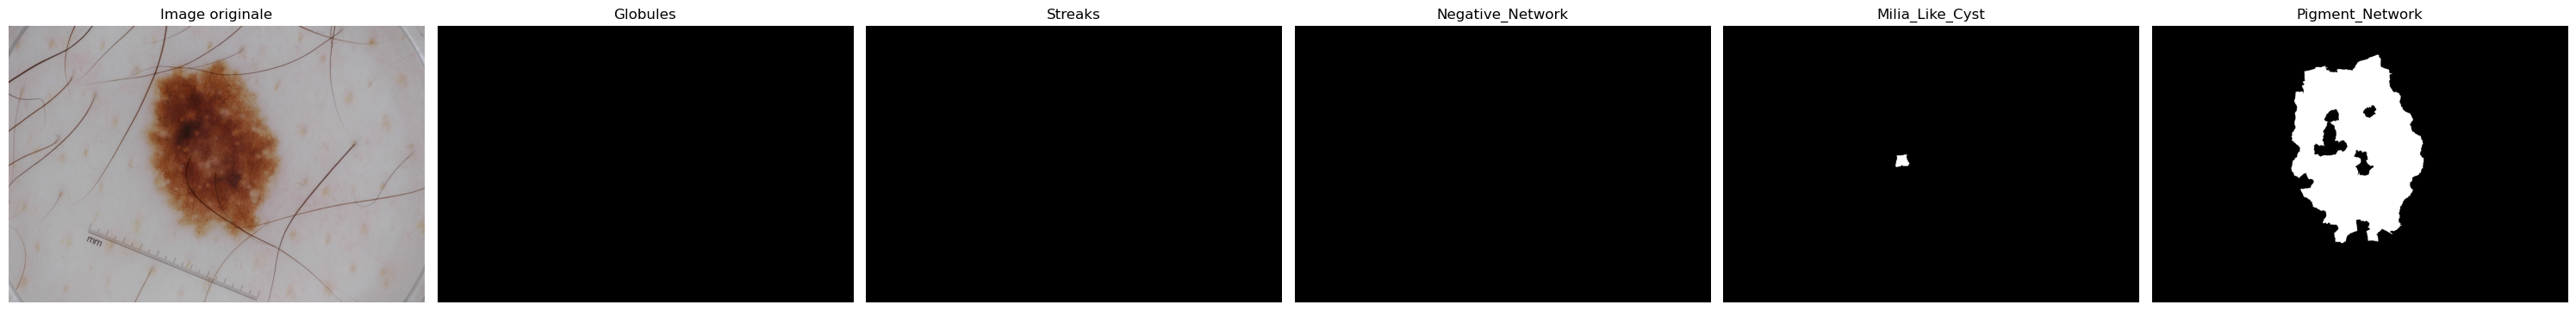

In [31]:
import os
import cv2
import glob
import matplotlib.pyplot as plt

def afficher_image_et_ses_masques(image_name, images_dir, masks_dir):
    base_name = image_name.replace(".jpg", "")
    
    # Charger l'image
    img_path = os.path.join(images_dir, image_name)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Trouver tous les masques correspondant à cette image
    mask_files = glob.glob(os.path.join(masks_dir, f"{base_name}_attribute_*.png"))
    n = len(mask_files)

    # Préparer la figure
    fig, axes = plt.subplots(1, n + 1, figsize=(5 * (n + 1), 5))
    
    # Afficher l'image originale
    axes[0].imshow(image)
    axes[0].set_title("Image originale")
    axes[0].axis("off")
    
    # Afficher les masques
    for i, mask_path in enumerate(mask_files):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        axes[i + 1].imshow(mask, cmap="gray")
        axes[i + 1].set_title(os.path.basename(mask_path).split("_attribute_")[1].replace(".png", "").title())
        axes[i + 1].axis("off")
    
    plt.tight_layout()
    plt.show()

afficher_image_et_ses_masques("ISIC_0012684.jpg", images_dir, masks_dir)

##### Répartition des attributs 

In [32]:
from collections import defaultdict
import pandas as pd

# Dossier des masques
mask_files = glob.glob(os.path.join(masks_dir, "*.png"))

# Dictionnaire image → attributs présents
image_to_attrs = defaultdict(list)

for m in mask_files:
    name = os.path.basename(m)
    image_id, attr = name.split("_attribute_")
    attr = attr.replace(".png", "")
    image_to_attrs[image_id].append(attr)

# Exemple
for img, attrs in list(image_to_attrs.items())[:5]:
    print(f"{img} → {attrs}")


ISIC_0012684 → ['globules', 'streaks', 'negative_network', 'milia_like_cyst', 'pigment_network']
ISIC_0014473 → ['pigment_network', 'streaks', 'globules', 'negative_network', 'milia_like_cyst']
ISIC_0015062 → ['negative_network', 'pigment_network', 'globules', 'milia_like_cyst', 'streaks']
ISIC_0010356 → ['negative_network', 'globules', 'milia_like_cyst', 'streaks', 'pigment_network']
ISIC_0013922 → ['pigment_network', 'milia_like_cyst', 'streaks', 'negative_network', 'globules']


In [33]:
from collections import Counter

all_attrs = [attr for attrs in image_to_attrs.values() for attr in attrs]
attr_counts = Counter(all_attrs)

# Affichage joli
pd.DataFrame.from_dict(attr_counts, orient="index", columns=["Nombre d’images"]).sort_values(by="Nombre d’images", ascending=False)


,Nombre d’images
globules,2584
streaks,2584
negative_network,2584
milia_like_cyst,2584
pigment_network,2584


##### chaque image est associée à 5 fichiers masque .si l'attribut est complételment absent le fichier masque est en noir . on va essayer donc de filtrer les images avec les masques qui sont réellement présent .

In [40]:
import os 
import cv2
from collections import Counter
import glob
attributes = ["globules" , "streaks" , "negative_network" , "milia_like_cyst", "pigment_network"]

empty_count= Counter()
total_count= Counter()

mask_files = glob.glob(os.path.join(masks_dir, "*.png"))
print("1")
for mas_path in mask_files :
    attr_found = None
    for attr in attributes:
        if attr in mas_path:
            attr_found = attr 
            break
            
    if attr_found is  None:
        continue 
    mask = cv2.imread(mas_path, cv2.IMREAD_GRAYSCALE)

    total_count[attr_found] += 1
    if cv2.countNonZero(mask) == 0:
        empty_count[attr_found] += 1


1


In [41]:
    
# Affichage joli

for attr in attributes:
    total = total_count[attr]
    empty = empty_count[attr]

    print(f"{attr:<20} : {empty} masques vides / {total} (soit {empty / total:.1%})")


globules             : 1982 masques vides / 2584 (soit 76.7%)
streaks              : 2484 masques vides / 2584 (soit 96.1%)
negative_network     : 2394 masques vides / 2584 (soit 92.6%)
milia_like_cyst      : 1904 masques vides / 2584 (soit 73.7%)
pigment_network      : 1071 masques vides / 2584 (soit 41.4%)


##### les attributs les plus présents dans notre datasets( ceux qui réellement existants par opposition aux masques avce que des pixels en noirs) sont:  streaks et negative_netwok soit environ plus de 90 % , suivi de globules et milia_like_cyst (  environ  74 %)  et enfin pigment network 2 fois moins présent (soit 41 %).  

#### ces informations sont éssentilles pour la suite de notre analyse . 

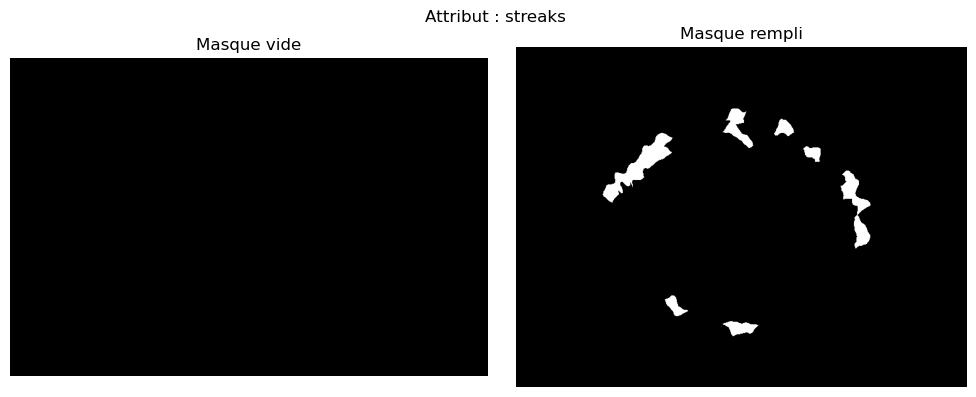

In [ ]:
import matplotlib.pyplot as plt

def show_example_masks(attribute, masks_dir):
    mask_paths = [f for f in glob.glob(os.path.join(masks_dir, "*.png")) if attribute in f]
    
    empty_path = None
    filled_path = None

    for path in mask_paths:
        mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if cv2.countNonZero(mask) == 0 and empty_path is None:
            empty_path = path
        elif cv2.countNonZero(mask) != 0 and filled_path is None:
            filled_path = path
        if empty_path and filled_path:
            break

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    if empty_path:
        axs[0].imshow(cv2.imread(empty_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
        axs[0].set_title("Masque vide")
        axs[0].axis("off")
    if filled_path:
        axs[1].imshow(cv2.imread(filled_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
        axs[1].set_title("Masque rempli")
        axs[1].axis("off")
    
    fig.suptitle(f"Attribut : {attribute}")
    plt.tight_layout()
    plt.show()

show_example_masks("streaks", masks_dir)

#### exploration 

In [ ]:
images_path = "data/procesed/images"
masks_path = "data/processed/masks"

In [1]:
Target_size = (128 , 128)

In [ ]:
def load_and_preprocess(image_path , mask_path , target_size=(128 , 128)) :
    #on charge l image 
    image = cv2.imread(image_path)
    image = cv2.resize(image , target_size)
    image = image / 255.0  # pour la normalisation 

    #on charge le masque 

    mask = cv2.imread(mask_path)
    mask = cv2.resize( mask , target_size)
    mask = mask / 255.0

    mask = np.expand_dims(mask , axis = 1)  # a revoir 
    return image , mask 